In [1]:
import numpy as np

In [6]:
X = np.linspace(1,10,10000)
#X
y = 2*X + 5

In [7]:
from sklearn.linear_model import LinearRegression as lr

In [8]:
model = lr()

In [9]:
model.fit(X.reshape(-1,1),y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.coef_

array([2.])

In [11]:
model.intercept_

5.000000000000007

In [14]:
model.predict(1.5)

array([8.])

In [19]:
model.score(X.reshape(-1,1),y)

1.0

## House price prediction problem

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/house_rental_data.csv',index_col='Unnamed: 0')
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [23]:
# see the list of columns in a dataframe
df.columns
df1 = df[['Sqft','Price']]
df1.head()

,Sqft,Price
1,1177.698,62000
2,2134.800,78000
3,1138.560,58000
4,1458.780,45000
5,967.776,45000


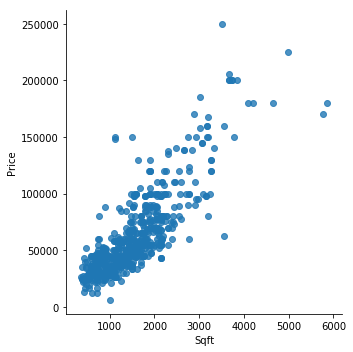

In [28]:
import seaborn as sns
#sns.distplot(df.Sqft)
sns.lmplot(data=df1,x='Sqft',y='Price',fit_reg=False)

In [4]:
# import package from scikit learn for doing linear regression
from sklearn.linear_model import LinearRegression

In [5]:
# instantiate a new object of the class
model = LinearRegression()

In [6]:
# split the data into train and test
from sklearn.model_selection import train_test_split
feature_set = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
#feature_set = df1['Sqft']
feature_set.columns
trainX,testX,trainy,testy = train_test_split(feature_set,df.Price)

In [7]:
# build the model using the training datasets
model.fit(trainX,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# print the intercept value of the best fit line => theta0
model.intercept_

3805.7232181923537

In [9]:
# print the coefficient value of the best fit line => theta1
model.coef_

array([   37.10059099,   871.31245626,   175.77246648, -1884.64331241,
       -3152.34230665,  3261.16515843])

In [10]:
# print the r^2 value of the model
model.score(testX,testy)

0.7607602054233337

In [11]:
# print the list of predicted y values by feeding in the test data
pred_y=model.predict(testX.values.reshape(-1,1))

ValueError: shapes (972,1) and (6,) not aligned: 1 (dim 1) != 6 (dim 0)

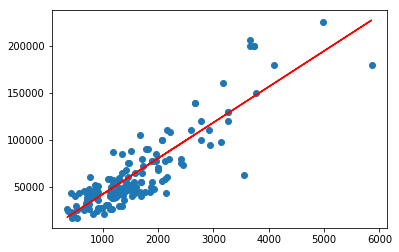

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(testX,testy)
plt.plot(testX,pred_y,color='r')

In [25]:
#residual analysis
resd = pred_y - testy

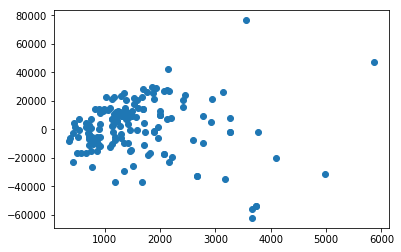

In [26]:
# the scatter plot should reveal that the residuals do not form a shape
plt.scatter(testX.values.reshape(-1,1),resd)

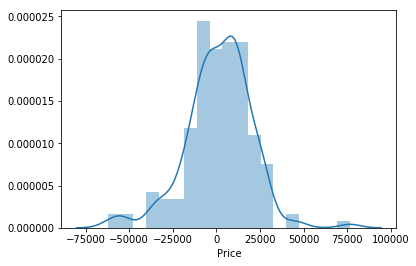

In [27]:
# the residuals should be normally distributed
sns.distplot(resd)

C:\Users\Amit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
features